<a href="https://colab.research.google.com/github/danielgarciamna/cienciadedatos/blob/master/Actividad7PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Emilio Alejandro Martínez López
  *   MATRÍCULA: A01796936

*  NOMBRE: Pedro David Juárez Leyva
  *  MATRÍCULA: A01797041

*  NOMBRE: Daniel Edgardo García Bonilla
  *  MATRÍCULA: A01797180


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [5]:
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [6]:
cereals_df.describe(include='object').T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

In [7]:
cereals_df['mfr'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 77 entries, 0 to 76
Series name: mfr
Non-Null Count  Dtype 
--------------  ----- 
77 non-null     object
dtypes: object(1)
memory usage: 748.0+ bytes


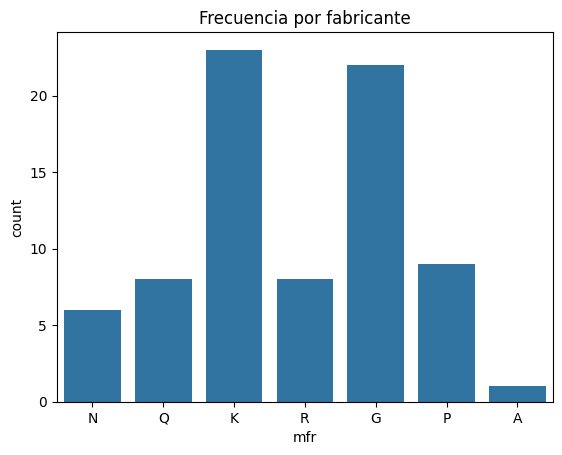

In [8]:
sns.countplot(x='mfr', data= cereals_df)
plt.title('Frecuencia por fabricante')
plt.show()

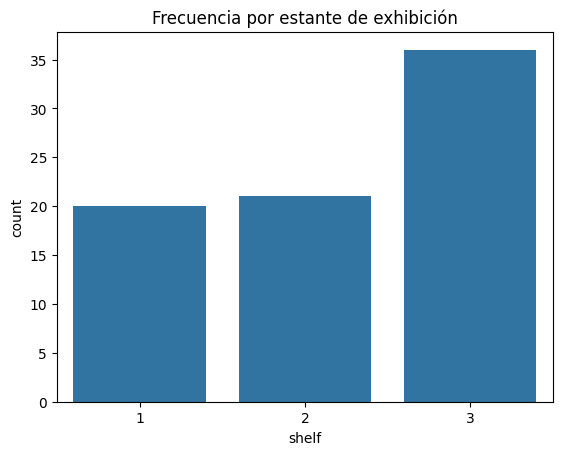

In [9]:
sns.countplot(x='shelf', data= cereals_df)
plt.title('Frecuencia por estante de exhibición')
plt.show()

> 💬 Se puede observar que la categoría predominante para "mfr" es K, que corresponde a Kelloggs.

> Para el caso de la columna "self", predomina la categoría 3. Por lo que el estante de exhibición es el número 3.

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [10]:
cereals_df.groupby(['mfr', 'shelf']).size()

mfr  shelf
A    2         1
G    1         6
     2         7
     3         9
K    1         4
     2         7
     3        12
N    1         3
     2         2
     3         1
P    1         2
     2         1
     3         6
Q    1         1
     2         3
     3         4
R    1         4
     3         4
dtype: int64

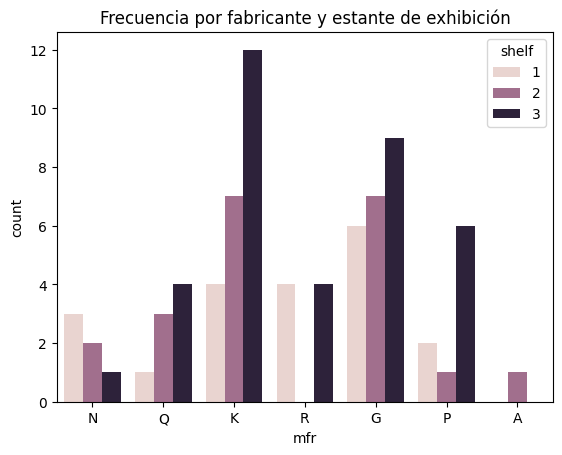

In [11]:
sns.countplot(x='mfr', hue='shelf', data=cereals_df)
plt.title('Frecuencia por fabricante y estante de exhibición')
plt.show()

> 💬 Kelloggs es el fabricante con mayor cantidad de productos. Sin embargo, se puede observar que la mayoría se encuentran en el estante 3.
>  
> El estante 2 está predominado por Kelloggs (K) y General Mills (G). Considerando que General Mills tiene una menor cantidad de productos en cada estante en comparación a Kelloggs.
>
> General Mills (G) predomina el estante 1.

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

<Axes: xlabel='rating', ylabel='Count'>

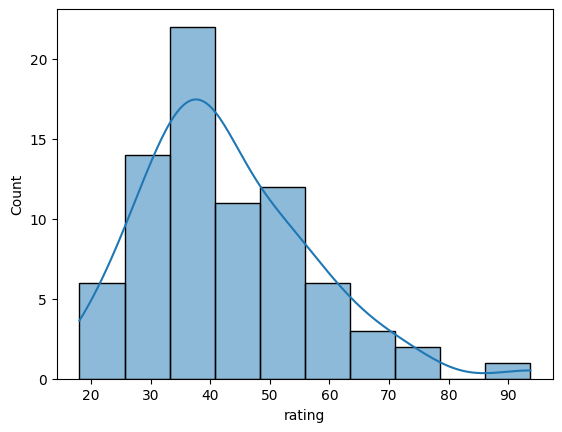

In [12]:
sns.histplot(cereals_df["rating"], bins=10, kde=True)

El rango de rating que representa la mayor frecuencia está aproximadamente entre 35 y 40

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [13]:
top10=cereals_df.iloc[cereals_df['rating'].sort_values(ascending=False).head(10).index, :][['name', 'mfr', 'rating']]
top10

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


<Axes: xlabel='rating', ylabel='name'>

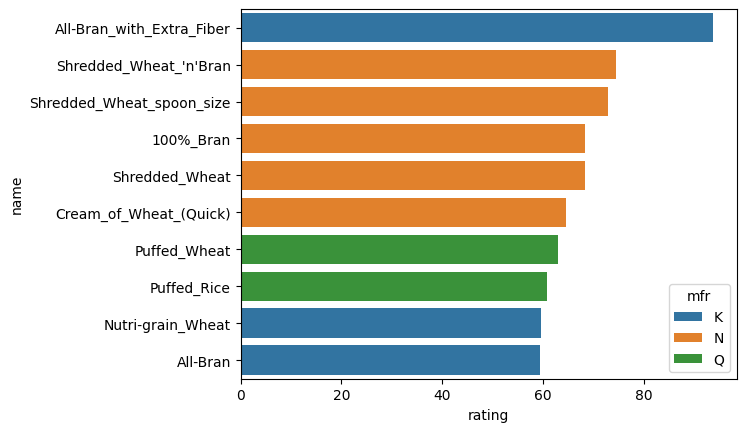

In [14]:
sns.barplot(x='rating', y='name', data=top10,hue='mfr')

>
> 💬 Los 10 cereales mejor evaluados son:

- Bran_with_Extra_Fiber
- Shredded_Wheat_'n'Bran
- Shredded_Wheat_spoon_size
- 100%_Bran
- Shredded_Wheat
- Cream_of_Wheat_(Quick)
- Puffed_Wheat
- Puffed_Rice
- Nutri-grain_Wheat
- All-Bran

> De estos 10 cereales, 3 pertenecen a Kelloggs, 5 a Nabisco y 2 a Quaker Oats.

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

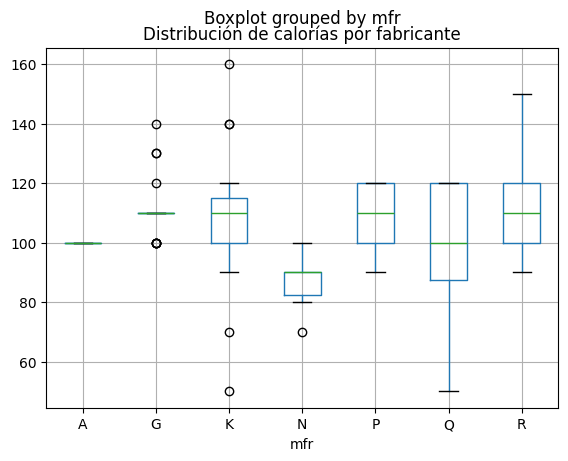

In [15]:
cereals_df.boxplot(column='calories', by='mfr')
plt.title('Distribución de calorías por fabricante')
plt.show()

> 💬 Se puede observar que Ralston Purina (R) y Kelloggs (K) son los fabricantes que muestran un mayor contenido calórico.
>
> Se observa que Nabisco (N) tiene cereales con menor contenido calórico  dentro de su gama de productos en comparación con los otros fabricantes. En general se puede ver que Quaker Oats (Q) y Kelloggs (K) llegan a tener algunos productos con el menor contenido calórico.
> El caso de Kelloggs es especial debido a que muestra productos con el contenido calórico más elevado y también el más bajo.
>
> American Home Food Products (A) muestra poca variabilidad calórica dentro de sus productos.
>
>En comparación a todas las medias, la marca Nabisco (N) tiene un menor contenido calórico que las demás marcas de cereales.

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

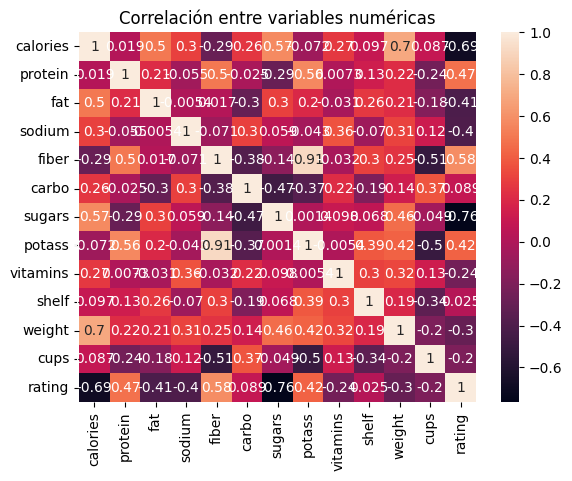

In [16]:
df_num = cereals_df.select_dtypes(include=[np.number])
sns.heatmap(df_num.corr(), annot=True)
plt.title('Correlación entre variables numéricas')
plt.show()

Las calorías y los azúcares están relacionados inversamente a la variable rating con correlaciones de -0.69 y -0.76 respectivamente.

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [17]:
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [18]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.4+ KB


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [19]:
y= cereals_df['rating']
X = cereals_df.select_dtypes(include='number').drop(columns=['rating', 'shelf'])

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=scaler.get_feature_names_out())

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_transformed,)

principalComponents = pd.DataFrame(principalComponents,columns=scaler.get_feature_names_out())
print(principalComponents.shape)
principalComponents.head(5)

(74, 11)


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,5.041308,-2.470097,-0.054581,-1.129434,0.667588,0.640401,-0.022399,0.059205,-0.026325,-0.250917,0.021692
1,1.503568,0.310316,-3.014154,3.202758,1.344651,0.066992,0.396573,-1.228817,0.594837,-0.042521,-0.096381
2,4.866598,-1.946814,0.869813,-1.225550,0.358265,1.832924,0.232872,0.017511,-0.116766,0.493001,-0.031211
3,5.468886,-3.899001,1.883856,-1.628993,0.601691,0.374002,0.811525,-1.003853,-0.063792,-0.720550,0.101563
4,0.088378,0.391583,-1.490079,0.054716,0.331903,0.848360,-0.271351,0.033091,0.183945,-0.169367,-0.050918


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

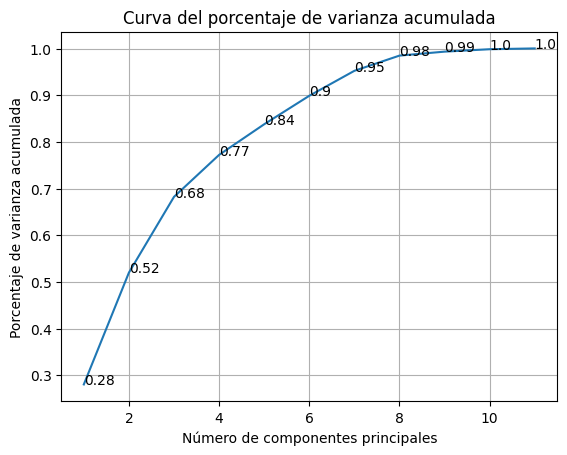

In [22]:
variance_ratio= list(np.round(pca.explained_variance_ratio_, decimals=4))
plt.plot(range(1, len(variance_ratio)+1), np.cumsum(variance_ratio))

for i in range(len(variance_ratio)):
  plt.annotate(np.round(np.cumsum(variance_ratio)[i],decimals=2), (i+1, np.cumsum(variance_ratio)[i]))

plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.title('Curva del porcentaje de varianza acumulada')
plt.grid()
plt.show()

In [23]:
covM = X_transformed.cov()
covM

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
calories,1.013699,0.034457,0.514324,0.300306,-0.299256,0.274313,0.576917,-0.072339,0.263405,0.705993,0.090418
protein,0.034457,1.013699,0.205125,0.011717,0.521047,-0.037247,-0.290510,0.586671,0.055550,0.233831,-0.245415
fat,0.514324,0.205125,1.013699,0.000833,0.014228,-0.288837,0.291086,0.202371,-0.030932,0.224751,-0.159737
sodium,0.300306,0.011717,0.000833,1.013699,-0.071704,0.332908,0.037567,-0.039978,0.336118,0.316815,0.121222
fiber,-0.299256,0.521047,0.014228,-0.071704,1.013699,-0.384277,-0.153016,0.923990,-0.039248,0.249666,-0.520734
carbo,0.274313,-0.037247,-0.288837,0.332908,-0.384277,1.013699,-0.458262,-0.370003,0.257053,0.146789,0.363192
sugars,0.576917,-0.290510,0.291086,0.037567,-0.153016,-0.458262,1.013699,0.001433,0.073954,0.466856,-0.032880
potass,-0.072339,0.586671,0.202371,-0.039978,0.923990,-0.370003,0.001433,1.013699,-0.002672,0.426323,-0.508561
vitamins,0.263405,0.055550,-0.030932,0.336118,-0.039248,0.257053,0.073954,-0.002672,1.013699,0.324824,0.135460
weight,0.705993,0.233831,0.224751,0.316815,0.249666,0.146789,0.466856,0.426323,0.324824,1.013699,-0.204478


In [24]:
# Calcular valores propios

print(f"Valores propios")
print(list(np.round(pca.explained_variance_, decimals=8)))

Valores propios
[3.12423724, 2.67115822, 1.81049171, 1.00253443, 0.73121381, 0.68051457, 0.59632332, 0.36297597, 0.0942425, 0.05849702, 0.01849615]


In [25]:
# Porcentaje de varianza

print("Porcentaje de varianza")
print(pca.explained_variance_ratio_*100)

Porcentaje de varianza
[28.01834379 23.95510445 16.23659637  8.9907879   6.55756856  6.10289481
  5.34786268  3.25518991  0.84517226  0.52460471  0.16587455]


In [26]:
# Varianza acumulada

np.cumsum(pca.explained_variance_ratio_)

array([0.28018344, 0.51973448, 0.68210045, 0.77200833, 0.83758401,
       0.89861296, 0.95209159, 0.98464348, 0.99309521, 0.99834125,
       1.        ])

In [27]:
# Vectores propios
print("Vectores propios:")
print(pca.components_)

Vectores propios:
[[-0.01040615  0.35678238  0.19027226 -0.06472068  0.49998564 -0.29577872
   0.05873503  0.531454   -0.03734692  0.23742301 -0.38868677]
 [ 0.57512964 -0.00479327  0.2692828   0.30430762 -0.1470962   0.14486307
   0.37580261 -0.01267244  0.29039314  0.48086725  0.06718836]
 [-0.07785426  0.32653778 -0.29122351  0.34318558  0.17405705  0.51293536
  -0.49525541  0.13062106  0.32745985  0.1221902   0.08261713]
 [ 0.23576248  0.44809296  0.59457322 -0.20063091 -0.18502884  0.20885433
  -0.33946029 -0.07425895 -0.33740132 -0.15254926  0.11892967]
 [-0.15547992  0.19572539  0.26570851 -0.07702948  0.02349511 -0.36158515
   0.03255133  0.02967232  0.67369701 -0.28852785  0.43661327]
 [-0.14674673 -0.10712071  0.31086037  0.82872108 -0.00308753 -0.21194747
  -0.08706042 -0.05225799 -0.15137244 -0.28016639 -0.16410138]
 [-0.00854826  0.15544658 -0.19788634  0.1976367   0.1709157  -0.11010741
   0.20109792  0.20621127 -0.46343787  0.10778835  0.73949425]
 [ 0.03123778  0.686318

In [28]:
num_components = 7

pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns=X.columns, index=["Principal component {}".format(i) for i in range(1, num_components+1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
Principal component 1,0.010406,0.356782,0.190272,0.064721,0.499986,0.295779,0.058735,0.531454,0.037347,0.237423,0.388687
Principal component 2,0.575130,0.004793,0.269283,0.304308,0.147096,0.144863,0.375803,0.012672,0.290393,0.480867,0.067188
Principal component 3,0.077854,0.326538,0.291224,0.343186,0.174057,0.512935,0.495255,0.130621,0.327460,0.122190,0.082617
Principal component 4,0.235762,0.448093,0.594573,0.200631,0.185029,0.208854,0.339460,0.074259,0.337401,0.152549,0.118930
Principal component 5,0.155480,0.195725,0.265709,0.077029,0.023495,0.361585,0.032551,0.029672,0.673697,0.288528,0.436613
Principal component 6,0.146747,0.107121,0.310860,0.828721,0.003088,0.211947,0.087060,0.052258,0.151372,0.280166,0.164101
Principal component 7,0.008548,0.155447,0.197886,0.197637,0.170916,0.110107,0.201098,0.206211,0.463438,0.107788,0.739494


Se eligieron 7 componentes principales que representan el 90% de la varianza de los productos.

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


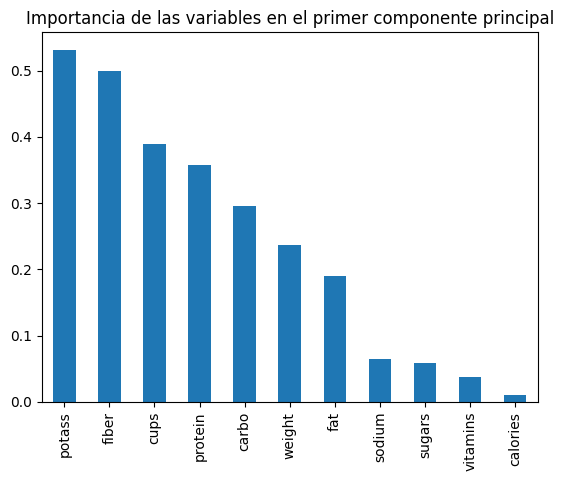

In [29]:
pc_df.iloc[0,:].sort_values(ascending=False).plot(kind='bar')
plt.title('Importancia de las variables en el primer componente principal')
plt.show()

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

Se tomarán solamente el tipo y el fabricante, ya que el nombre no es una variable que tenga mucha influencia en el rating de los cereales.

In [30]:
cereals_cat= cereals_df[['mfr', 'shelf']]
cereals_cat

,mfr,shelf
0,N,3
1,Q,3
2,K,3
3,K,3
4,G,1
...,...,...
69,G,3
70,G,2
71,R,1
72,G,1


In [31]:
cereals_df.groupby('type').size()

,0
type,
C,73
H,1


In [32]:
cereals_df.groupby('name').size()

,0
name,
100%_Bran,1
100%_Natural_Bran,1
All-Bran,1
All-Bran_with_Extra_Fiber,1
Apple_Cinnamon_Cheerios,1
...,...
Triples,1
Trix,1
Wheat_Chex,1


Name no se toma como variable predictora ya que se considera un identificador único de cada cereal. Y la variable type no tiene suficientes datos del tipo Hot, por lo que no se considera una variable que influya en la predicción.

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
cereals_cat_encoded = encoder.fit_transform(cereals_cat)
cereals_cat_encoded = pd.DataFrame(cereals_cat_encoded, columns=encoder.get_feature_names_out(['mfr','shelf']))
cereals_cat_encoded

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [34]:
new_data =principalComponents.iloc[:, 0:num_components]
new_data.columns = ['PC{}'.format(i) for i in range(1, num_components + 1)]

final_data = pd.concat([new_data, cereals_cat_encoded], axis=1)
final_data = pd.concat([final_data, y], axis=1)

final_data.to_csv('cereals_transformed.csv',index=False)

In [35]:
final_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3,rating
0,5.041308,-2.470097,-0.054581,-1.129434,0.667588,0.640401,-0.022399,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,68.402973
1,1.503568,0.310316,-3.014154,3.202758,1.344651,0.066992,0.396573,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,33.983679
2,4.866598,-1.946814,0.869813,-1.225550,0.358265,1.832924,0.232872,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.425505
3,5.468886,-3.899001,1.883856,-1.628993,0.601691,0.374002,0.811525,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,93.704912
4,0.088378,0.391583,-1.490079,0.054716,0.331903,0.848360,-0.271351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.442524,0.260808,1.160446,0.531351,-1.053122,0.817503,-0.665223,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.106174
70,-1.634842,0.417530,-1.672206,-0.593553,0.134293,-0.082682,0.257906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.753301
71,0.389697,-0.475626,1.182007,0.334499,-0.494861,0.820825,-0.328101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.787445
72,-0.172304,-0.491070,1.163945,0.580625,0.146570,0.290806,0.627485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.592193
